In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'30',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'fa154a70-d8f3-4dbb-a891-3bdd209e5b1d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-03-05T17:57:02.082Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 10795}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11969, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd
pd.set_option('display.max_column', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [5]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11969,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.983263e+07,1.983263e+07,False,NaN,1,NaN,NaN,None,2025-03-05T17:56:00.000Z,89847.474085,5.861614e+10,-20.4269,1.420019,5.190295,4.824339,-9.435745,-8.288032,-11.167844,1.781912e+12,60.8714,1.886797e+12,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
1,1027,Ethereum,ETH,ethereum,9961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205925e+08,1.205925e+08,True,NaN,2,NaN,NaN,None,2025-03-05T17:55:00.000Z,2193.716317,2.507589e+10,-34.0160,0.775222,3.457817,-7.110863,-18.795290,-39.581000,-44.004478,2.645457e+11,9.0371,2.645457e+11,None,2025-03-05T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,None,2025-03-05T17:56:00.000Z,2.486101,7.160132e+09,-49.0299,1.127101,1.524333,12.659346,-7.318250,2.512885,2.708583,1.440689e+11,4.9215,2.486101e+11,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
3,825,Tether USDt,USDT,tether,118374,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.424954e+11,1.445616e+11,True,NaN,4,NaN,NaN,None,2025-03-05T17:55:00.000Z,1.000015,1.043607e+11,-28.5899,0.019946,0.029265,0.109840,-0.036013,0.014444,-0.056467,1.424976e+11,4.8678,1.445638e+11,None,2025-03-05T17:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 17:56:56.783078
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424757e+08,1.424757e+08,False,NaN,5,NaN,NaN,None,2025-03-05T17:56:00.000Z,593.151379,1.592626e+09,-27.4334,0.475590,3.235177,-2.638154,-0.152162,-16.721801,-19.094415,8.450965e+10,2.8869,8.450965e+10,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.079423e+08,5.954361e+08,True,NaN,6,NaN,NaN,None,2025-03-05T17:56:00.000Z,142.661044,5.402848e+09,-42.3111,0.834329,1.373426,6.860367,-31.326002,-33.798769,-40.572560,7.246358e+10,2.4754,8.494554e+10,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
6,3408,USDC,USDC,usd-coin,26059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.684859e+10,5.684859e+10,False,NaN,7,NaN,NaN,None,2025-03-05T17:56:00.000Z,0.999909,1.023409e+10,-32.3895,-0.014395,-0.020853,-0.002022,-0.003360,-0.001794,0.001511,5.684344e+10,1.9418,5.684344e+10,None,2025-03-05T17:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 17:56:56.783078
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,None,2025-03-05T17:56:00.000Z,0.964065,4.606023e+09,-20.5698,1.207797,4.444340,46.947334,23.834727,-10.034135,-21.373549,3.394707e+10,1.1597,4.338293e+10,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:56:56.783078
8,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, m

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'fa154a70-d8f3-4dbb-a891-3bdd209e5b1d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\HP\OneDrive\Desktop\Automating Crypto Website API\API.csv'):
        df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Automating Crypto Website API\API.csv'  , header='column_names')
    else:
         df.to_csv(r'C:\Users\HP\OneDrive\Desktop\Automating Crypto Website API\API.csv'  ,mode = 'a', header= False)       

In [7]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60)
exit()

{'status': {'timestamp': '2025-03-05T17:57:06.683Z', 'error_code': 0, 'error_message': None, 'elapsed': 435, 'credit_count': 1, 'notice': None, 'total_count': 10795}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11969, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

KeyboardInterrupt: 

In [ ]:
df

In [8]:
df2 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Automating Crypto Website API\API.csv')
df2        

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11969,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.983263e+07,1.983263e+07,False,NaN,1,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,89847.474085,5.861614e+10,-20.4269,1.420019,5.190295,4.824339,-9.435745,-8.288032,-11.167844,1.781912e+12,60.8714,1.886797e+12,NaN,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
1,1,1027,Ethereum,ETH,ethereum,9961,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.205925e+08,1.205925e+08,True,NaN,2,NaN,NaN,NaN,2025-03-05T17:55:00.000Z,2193.716317,2.507589e+10,-34.0160,0.775222,3.457817,-7.110863,-18.795290,-39.581000,-44.004478,2.645457e+11,9.0371,2.645457e+11,NaN,2025-03-05T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
2,2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.794974e+10,9.998639e+10,False,NaN,3,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,2.486101,7.160132e+09,-49.0299,1.127101,1.524333,12.659346,-7.318250,2.512885,2.708583,1.440689e+11,4.9215,2.486101e+11,NaN,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
3,3,825,Tether USDt,USDT,tether,118374,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,1.424954e+11,1.445616e+11,True,NaN,4,NaN,NaN,NaN,2025-03-05T17:55:00.000Z,1.000015,1.043607e+11,-28.5899,0.019946,0.029265,0.109840,-0.036013,0.014444,-0.056467,1.424976e+11,4.8678,1.445638e+11,NaN,2025-03-05T17:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 17:57:00.732904
4,4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424757e+08,1.424757e+08,False,NaN,5,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,593.151379,1.592626e+09,-27.4334,0.475590,3.235177,-2.638154,-0.152162,-16.721801,-19.094415,8.450965e+10,2.8869,8.450965e+10,NaN,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
5,5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.079423e+08,5.954361e+08,True,NaN,6,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,142.661044,5.402848e+09,-42.3111,0.834329,1.373426,6.860367,-31.326002,-33.798769,-40.572560,7.246358e+10,2.4754,8.494554e+10,NaN,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
6,6,3408,USDC,USDC,usd-coin,26059,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.684859e+10,5.684859e+10,False,NaN,7,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,0.999909,1.023409e+10,-32.3895,-0.014395,-0.020853,-0.002022,-0.003360,-0.001794,0.001511,5.684344e+10,1.9418,5.684344e+10,NaN,2025-03-05T17:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 17:57:00.732904
7,7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.521242e+10,4.499494e+10,False,NaN,8,NaN,NaN,NaN,2025-03-05T17:56:00.000Z,0.964065,4.606023e+09,-20.5698,1.207797,4.444340,46.947334,23.834727,-10.034135,-21.373549,3.394707e+10,1.1597,4.338293e+10,NaN,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
8,8,74,Dogecoin,DOGE,dogecoin,1174,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'm

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11969,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19832631.00000,19832631.00000,False,NaN,1,None,None,None,2025-03-05T17:56:00.000Z,89847.47408,58616141892.31672,-20.42690,1.42002,5.19029,4.82434,-9.43574,-8.28803,-11.16784,1781911799808.14966,60.87140,1886796955783.17993,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
1,1027,Ethereum,ETH,ethereum,9961,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120592467.44609,120592467.44609,True,NaN,2,None,None,None,2025-03-05T17:55:00.000Z,2193.71632,25075885241.08141,-34.01600,0.77522,3.45782,-7.11086,-18.79529,-39.58100,-44.00448,264545663576.88193,9.03710,264545663576.88000,None,2025-03-05T17:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
2,52,XRP,XRP,xrp,1545,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57949738512.00000,99986390660.00000,False,NaN,3,None,None,None,2025-03-05T17:56:00.000Z,2.48610,7160131729.44021,-49.02990,1.12710,1.52433,12.65935,-7.31825,2.51288,2.70858,144068887680.43530,4.92150,248610073798.01001,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
3,825,Tether USDt,USDT,tether,118374,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,142495395118.64359,144561615222.92096,True,NaN,4,None,None,None,2025-03-05T17:55:00.000Z,1.00002,104360664533.24997,-28.58990,0.01995,0.02927,0.10984,-0.03601,0.01444,-0.05647,142497586246.83191,4.86780,144563838123.04001,None,2025-03-05T17:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-03-05 17:57:00.732904
4,1839,BNB,BNB,bnb,2382,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142475687.65000,142475687.65000,False,NaN,5,None,None,None,2025-03-05T17:56:00.000Z,593.15138,1592626186.67562,-27.43340,0.47559,3.23518,-2.63815,-0.15216,-16.72180,-19.09441,84509650592.23901,2.88690,84509650592.24001,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
5,5426,Solana,SOL,solana,847,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,507942292.64768,595436120.58339,True,NaN,6,None,None,None,2025-03-05T17:56:00.000Z,142.66104,5402848089.30631,-42.31110,0.83433,1.37343,6.86037,-31.32600,-33.79877,-40.57256,72463577953.89484,2.47540,84945538824.00999,None,2025-03-05T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-03-05 17:57:00.732904
6,3408,USDC,USDC,usd-coin,26059,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,56848593870.06162,56848593870.06162,False,NaN,7,None,None,None,2025-03-05T17:56:00.000Z,0.99991,10234093369.25605,-32.38950,-0.01439,-0.02085,-0.00202,-0.00336,-0.00179,0.00151,56843435239.39813,1.94180,56843435239.40000,None,2025-03-05T17:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-03-05 17:57:00.732904
7,2010,Cardano,ADA,cardano,1470,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35212423444.40199,44994943014.63995,False,NaN,8,None,None,None,2025-03-05T17:56:00.000Z,0.96407,4606023133.85347,-20.56980,1.20780,4.44434,46.94733,23.83473,-10.03414,-21.37355,33947065163.36411,1.15970,43382925198

In [11]:
df3 = df.groupby('name', sort = False) [['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.42002,5.19029,4.82434,-9.43574,-8.28803,-11.16784
Ethereum,0.77522,3.45782,-7.11086,-18.79529,-39.58100,-44.00448
XRP,1.12710,1.52433,12.65935,-7.31825,2.51288,2.70858
Tether USDt,0.01995,0.02927,0.10984,-0.03601,0.01444,-0.05647
BNB,0.47559,3.23518,-2.63815,-0.15216,-16.72180,-19.09441
Solana,0.83433,1.37343,6.86037,-31.32600,-33.79877,-40.57256
USDC,-0.01439,-0.02085,-0.00202,-0.00336,-0.00179,0.00151
Cardano,1.20780,4.44434,46.94733,23.83473,-10.03414,-21.37355
Dogecoin,1.30342,3.09171,0.13073,-25.59422,-47.41158,-54.45850


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      1.42002
             quote.USD.percent_change_24h     5.19029
             quote.USD.percent_change_7d      4.82434
             quote.USD.percent_change_30d    -9.43574
             quote.USD.percent_change_60d    -8.28803
             quote.USD.percent_change_90d   -11.16784
Ethereum     quote.USD.percent_change_1h      0.77522
             quote.USD.percent_change_24h     3.45782
             quote.USD.percent_change_7d     -7.11086
             quote.USD.percent_change_30d   -18.79529
             quote.USD.percent_change_60d   -39.58100
             quote.USD.percent_change_90d   -44.00448
XRP          quote.USD.percent_change_1h      1.12710
             quote.USD.percent_change_24h     1.52433
             quote.USD.percent_change_7d     12.65935
             quote.USD.percent_change_30d    -7.31825
             quote.USD.percent_change_60d     2.51288
             quote.USD.percent_change_90

In [13]:
df5 = df4.to_frame(name = 'value')
df5

value
name                                              
Bitcoin     quote.USD.percent_change_1h    1.42002
            quote.USD.percent_change_24h   5.19029
            quote.USD.percent_change_7d    4.82434
            quote.USD.percent_change_30d  -9.43574
            quote.USD.percent_change_60d  -8.28803
            quote.USD.percent_change_90d -11.16784
Ethereum    quote.USD.percent_change_1h    0.77522
            quote.USD.percent_change_24h   3.45782
            quote.USD.percent_change_7d   -7.11086
            quote.USD.percent_change_30d -18.79529
            quote.USD.percent_change_60d -39.58100
            quote.USD.percent_change_90d -44.00448
XRP         quote.USD.percent_change_1h    1.12710
            quote.USD.percent_change_24h   1.52433
            quote.USD.percent_change_7d   12.65935
            quote.USD.percent_change_30d  -7.31825
            quote.USD.percent_change_60d   2.51288
            quote.USD.percent_change_90d   2.70858
Tether USDt quote.USD.percent_change_1h    0.01995
            quote.USD.percent_change_24h   0.02927
            quote.USD.percent_change_7d    0.10984
            quote.USD.percent_change_30d  -0.03601
            quote.USD.percent_change_60d   0.01444
            quote.USD.percent_change_90d  -0.05647
BNB         quote.USD.percent_change_1h    0.47559
            quote.USD.percent_change_24h   3.23518
            quote.USD.percent_change_7d   -2.63815
            quote.USD.percent_change_30d  -0.15216
            quote.USD.percent_change_60d -16.72180
            quote.USD.percent_change_90d -19.09441
Solana      quote.USD.percent_change_1h    0.83433
            quote.USD.percent_change_24h   1.37343
            quote.USD.percent_change_7d    6.86037
            quote.USD.percent_change_30d -31.32600
            quote.USD.percent_change_60d -33.79877
            quote.USD.percent_change_90d -40.57256
USDC        quote.USD.percent_change_1h   -0.01439
            quote.USD.percent_change_24h  -0.02085
            quote.USD.percent_change_7d   -0.00202
            quote.USD.percent_change_30d  -0.00336
            quote.USD.percent_change_60d  -0.00179
            quote.USD.percent_change_90d   0.00151
Cardano     quote.USD.percent_change_1h    1.20780
            quote.USD.percent_change_24h   4.44434
            quote.USD.percent_change_7d   46.94733
            quote.USD.percent_change_30d  23.83473
            quote.USD.percent_change_60d -10.03414
            quote.USD.percent_change_90d -21.37355
Dogecoin    quote.USD.percent_change_1h    1.30342
            quote.USD.percent_change_24h   3.09171
            quote.USD.percent_change_7d    0.13073
            quote.USD.percent_change_30d -25.59422
            quote.USD.percent_change_60d -47.41158
            quote.USD.percent_change_90d -54.45850
TRON        quote.USD.percent_change_1h    0.01476
            quote.USD.percent_change_24h   2.71594
            quote.USD.percent_change_7d    8.15394
            quote.USD.percent_change_30d   7.97511
            quote.USD.percent_change_60d  -9.69345
            quote.USD.percent_change_90d -26.68151

In [14]:
df5.count()

value    60
dtype: int64

In [15]:
index = pd.Index(range(60))

df6 = df5.reset_index()
df6

,name,level_1,value
0,Bitcoin,quote.USD.percent_change_1h,1.42002
1,Bitcoin,quote.USD.percent_change_24h,5.19029
2,Bitcoin,quote.USD.percent_change_7d,4.82434
3,Bitcoin,quote.USD.percent_change_30d,-9.43574
4,Bitcoin,quote.USD.percent_change_60d,-8.28803
5,Bitcoin,quote.USD.percent_change_90d,-11.16784
6,Ethereum,quote.USD.percent_change_1h,0.77522
7,Ethereum,quote.USD.percent_change_24h,3.45782
8,Ethereum,quote.USD.percent_change_7d,-7.11086
9,Ethereum,quote.USD.percent_change_30d,-18.79529


In [16]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,value
0,Bitcoin,quote.USD.percent_change_1h,1.42002
1,Bitcoin,quote.USD.percent_change_24h,5.19029
2,Bitcoin,quote.USD.percent_change_7d,4.82434
3,Bitcoin,quote.USD.percent_change_30d,-9.43574
4,Bitcoin,quote.USD.percent_change_60d,-8.28803
5,Bitcoin,quote.USD.percent_change_90d,-11.16784
6,Ethereum,quote.USD.percent_change_1h,0.77522
7,Ethereum,quote.USD.percent_change_24h,3.45782
8,Ethereum,quote.USD.percent_change_7d,-7.11086
9,Ethereum,quote.USD.percent_change_30d,-18.79529


In [17]:
df7['percent_change'] = df7['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

## How do different cryptocurrencies fluctuate over various timeframes? Analyzing short-term vs. long-term trends using CoinMarketCap API data

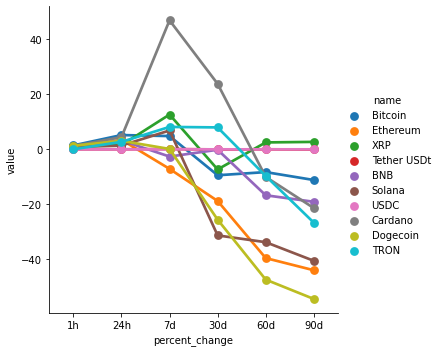

In [19]:

sns.catplot(x = 'percent_change', y = 'value', hue = 'name', data = df7, kind = 'point')

## How does Bitcoin's market capitalization compare to other leading cryptocurrencies?

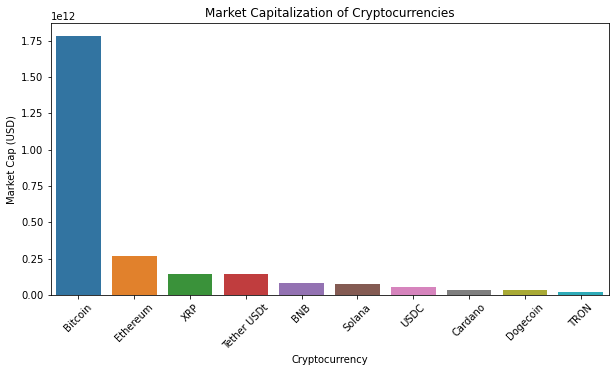

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['name'], y=df['quote.USD.market_cap'])
plt.title('Market Capitalization of Cryptocurrencies')
plt.xlabel('Cryptocurrency')
plt.ylabel('Market Cap (USD)')
plt.xticks(rotation=45)
plt.show()

## Which cryptocurrencies have shown the highest percentage change in the last 24 hours.

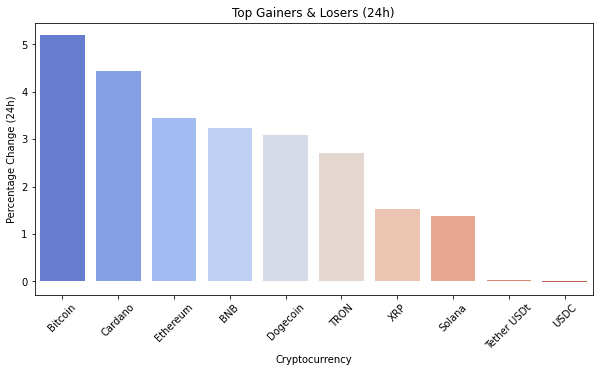

In [21]:
df_sorted = df.sort_values(by='quote.USD.percent_change_24h', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_sorted['name'], y=df_sorted['quote.USD.percent_change_24h'], palette='coolwarm')
plt.title('Top Gainers & Losers (24h)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Percentage Change (24h)')
plt.xticks(rotation=45)
plt.show()

## What is the market share of Bitcoin and Ethereum in the cryptocurrency market, and how does the overall market share distribution of cryptocurrencies look?

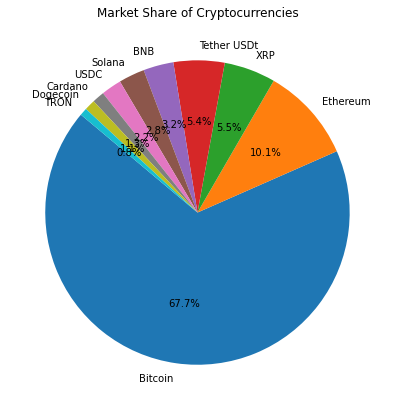

In [22]:
plt.figure(figsize=(7, 7))
plt.pie(df['quote.USD.market_cap'], labels=df['name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Cryptocurrencies')
plt.show()


## What is the price of Bitcoin on a log scale, how does the log scale represent cryptocurrency prices, and why is it used in cryptocurrency price visualization?

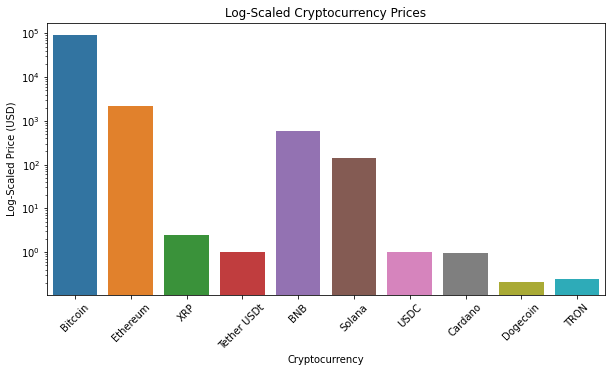

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['name'], y=df['quote.USD.price'])
plt.yscale('log')
plt.title('Log-Scaled Cryptocurrency Prices')
plt.xlabel('Cryptocurrency')
plt.ylabel('Log-Scaled Price (USD)')
plt.xticks(rotation=45)
plt.show()
